In [1]:
pip install gensim


In [2]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 4.6MB/s 
     |████████████████████████████████| 552kB 33.1MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=948ff959340015c459bdb0c2cf87d8289ae881e9a0a4332744c4a28284e07256
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=c75ea00bdf0ab38a08057c1c98083a44be5c7a06355d7b72392d9e464453eeb2
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
pip install bs4

In [3]:
pip install tornado==5.1.0

     |████████████████████████████████| 522kB 4.7MB/s 
  Created wheel for tornado: filename=tornado-5.1-cp36-cp36m-linux_x86_64.whl size=461863 sha256=3a3aec76109d1fb88e65b11cd25aae309127a0bd138855fc26400949e8c96e19
  Stored in directory: /root/.cache/pip/wheels/a3/fc/8b/cc9cae4f0c829663a49cc652ce7d994fa65434d61bb819c3d5
Successfully built tornado
  Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1


In [4]:
pip install aiohttp

     |████████████████████████████████| 1.2MB 5.2MB/s 
     |████████████████████████████████| 153kB 35.2MB/s 
     |████████████████████████████████| 266kB 24.6MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3162 sha256=317751347f30a513cbdbda6f348d9a8279433d1060c35752c050928945b051bf
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl


In [ ]:
from bs4 import BeautifulSoup
import argparse

import urllib.request
from lxml.html import fromstring


In [ ]:
import asyncio
from concurrent.futures import ThreadPoolExecutor
from contextlib import suppress
import os
from queue import Queue
from threading import Thread

In [ ]:
def all(html):
 doc_tree = BeautifulSoup(html)
 news_list = doc_tree.find_all("div", "item news b-tabloid__topic_news")
 return tuple(f"https://lenta.ru{news.find('a')['href']}" for news in news_list)

In [ ]:

import pandas as pd
#.read()
def textextract(site):
  response = urllib.request.urlopen(site)
  doc_tree = BeautifulSoup(response)
  tags = doc_tree.find("a", "item dark active")
  tags = tags.get_text() if tags else None
  body = doc_tree.find("div", attrs={"itemprop": "articleBody"})
  if not body:
    raise RuntimeError(f"Article body is not found")

  text = " ".join([p.get_text() for p in body.find_all("p")])

  topic = doc_tree.find("a", "b-header-inner__block")
  topic = topic.get_text() if topic else None

  title = doc_tree.find("h1", attrs={"itemprop": "headline"})
  title = title.get_text() if title else None
  return text


In [ ]:
from datetime import datetime, timedelta
import csv
def logic(start):
    date_start = datetime.strptime(start, '%Y.%m.%d')
    news = []
    text = []
    while date_start<=datetime.today():
      
      
      response = urllib.request.urlopen('https://lenta.ru/'+date_start.strftime("%Y/%m/%d"))
      date_start += timedelta(days=1)
      news += [all(response)]
    for i in range(len(news)):
      for link in news[i]:
        print(link)
        try: 
         text += [(textextract(link))]
        except:
          pass
    return text

# **Ниже в функцию логик передайте дату с которой начать выкачку в формате 'год.месяц.день' работать может долго. После всего данные можно выгрузить в меню слева**

In [ ]:
from google.colab import files


text = logic('2020.08.1')
df = pd.DataFrame()
df['text'] = text
gh = df.to_csv('lenta.csv')
files.download( gh ) 

https://lenta.ru/news/2020/08/01/avias/
https://lenta.ru/news/2020/08/01/rus_abh/
https://lenta.ru/news/2020/08/01/nelepo/
https://lenta.ru/news/2020/08/01/vina/
https://lenta.ru/news/2020/08/01/galamina/
https://lenta.ru/news/2020/08/01/dogovor/
https://lenta.ru/news/2020/08/01/maski/
https://lenta.ru/news/2020/08/01/alaska/
https://lenta.ru/news/2020/08/01/trumpmoney/
https://lenta.ru/news/2020/08/01/ohl/
https://lenta.ru/news/2020/08/01/tik_tok_forbidden/
https://lenta.ru/news/2020/08/01/no_dtp/
https://lenta.ru/news/2020/08/01/gaz_up/
https://lenta.ru/news/2020/08/01/guitar/
https://lenta.ru/news/2020/08/01/versiya/
https://lenta.ru/news/2020/08/01/natalia_oreiro/
https://lenta.ru/news/2020/08/01/ipoteka/
https://lenta.ru/news/2020/08/01/okhlobystin/
https://lenta.ru/news/2020/08/01/aviaflight/
https://lenta.ru/news/2020/08/01/fungus/
https://lenta.ru/news/2020/08/01/tax/
https://lenta.ru/news/2020/08/01/ub/
https://lenta.ru/news/2020/08/01/svr/
https://lenta.ru/news/2020/08/01/lik

TypeError: ignored

In [ ]:
df.to_csv('lenta.csv')

In [ ]:
print((text))

['В России в субботу, 1 августа, возобновляется международное авиасообщение, прерванное несколько месяцев назад из-за принятых в связи с пандемией коронавируса ограничительных мер. Соответствующее заявление ранее сделал премьер-министр Михаил Мишустин. На начальном этапе восстановления пассажирских авиаперевозок перелеты будут осуществляться из трех городов — Москвы, Санкт-Петербурга и Ростова-на-Дону. Мы руководствуемся эпидемиологической обстановкой, показателями заболеваемости, принципами взаимности Первыми тремя странами, с которыми восстановится сообщение, стали Великобритания, Турция и Танзания. С начала августа россияне смогут улететь в Лондон, Анкару, Стамбул и на остров Занзибар, а с 10 августа — в Анталью, Бодрум и Даламан. Кроме того, в пятницу, 31 июля, стало известно об открытии государственных границ России с Абхазией. Такое решение было принято по итогам заседания оперативного штаба по борьбе с распространением коронавируса, а также после оценки санитарно-эпидемиологичес

In [ ]:
%pylab inline
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import pandas as pd
import pickle as pk
from scipy import sparse as sp
import pandas as pd
import re
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import numpy as np
import warnings

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'datetime', 'fromstring', 'all']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#df = pd.DataFrame({'text': text[:, 0]})
df = pd.read_csv('lenta (1).csv')


df.head()

Unnamed: 0                                               text
0           0  В России в субботу, 1 августа, возобновляется ...
1           1  Ожидается, что границу России с Абхазией откро...
2           2  Президент США Дональд Трамп отреагировал на от...
3           3  Вдова украинского рэпера Энди Картрайта (насто...
4           4  Московского муниципального депутата Юлию Галям...

In [ ]:
from nltk.tokenize import RegexpTokenizer

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop] for doc in texts]
def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
          # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.
    docs = [[token for token in doc if not token in stop] for doc in docs]

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

In [ ]:
import gensim
from gensim.utils import simple_preprocess

clean = []
for w in range(len(df['text'])):
    desc = df['text'][w].lower()
    
    #уберем путкутацию
    
    
    #минус тэги
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #- цифры
    desc=re.sub("(\\d|\\W)+"," ",desc)
    clean.append(desc)
df['clean'] = clean
df.head()
clean = df['clean']
df.head()
#print('\n\n tokenized and lemmatized document: ')#print(preprocess(doc_sample))

Unnamed: 0  ...                                              clean
0           0  ...  в россии в субботу августа возобновляется межд...
1           1  ...  ожидается что границу россии с абхазией открою...
2           2  ...  президент сша дональд трамп отреагировал на от...
3           3  ...  вдова украинского рэпера энди картрайта настоя...
4           4  ...  московского муниципального депутата юлию галям...

[5 rows x 3 columns]

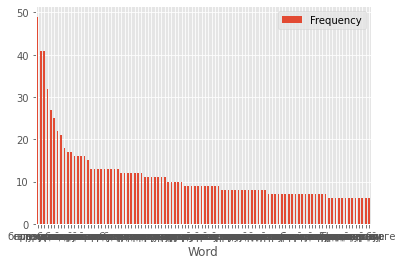

In [ ]:
top_N = 100
stop =['...','в','и','c','из','за','по','о','от','не','к','у','об','для','на','с','п','что','р','м','при','во','т','как','пр','з','ка','или','было',
       'произошел','данным','по','два','д','со','россии','российской','риа','новости','н','а','б']
words = nltk.tokenize.word_tokenize( (df['clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))).to_string())
from IPython.core.display import HTML

word_dist = nltk.FreqDist(words)
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stop) 

rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])


rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
display(HTML(rslt.to_html()))
matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0)

In [ ]:
corpus = clean
from gensim.utils import simple_preprocess
import gensim
import spacy
bigram = gensim.models.Phrases(corpus, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[corpus], threshold=100)  
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



In [ ]:
corpus = []
clean = remove_stopwords(clean)
for col in clean:
    
   
    corpus.append(corpus)


In [ ]:
docs = clean
print(clean)

[['субботу', 'августа', 'возобновляется', 'международное', 'авиасообщение', 'прерванное', 'несколько', 'месяцев', 'назад', 'принятых', 'связи', 'пандемией', 'коронавируса', 'ограничительных', 'мер', 'соответствующее', 'заявление', 'ранее', 'сделал', 'премьер', 'министр', 'михаил', 'мишустин', 'начальном', 'этапе', 'восстановления', 'пассажирских', 'авиаперевозок', 'перелеты', 'будут', 'осуществляться', 'трех', 'городов', 'москвы', 'санкт', 'петербурга', 'ростова', 'дону', 'мы', 'руководствуемся', 'обстановкой', 'показателями', 'заболеваемости', 'принципами', 'взаимности', 'первыми', 'тремя', 'странами', 'которыми', 'восстановится', 'сообщение', 'стали', 'великобритания', 'турция', 'танзания', 'начала', 'августа', 'россияне', 'смогут', 'улететь', 'лондон', 'анкару', 'стамбул', 'остров', 'занзибар', 'августа', 'анталью', 'бодрум', 'даламан', 'кроме', 'того', 'пятницу', 'июля', 'стало', 'известно', 'открытии', 'государственных', 'границ', 'абхазией', 'такое', 'решение', 'принято', 'итогам

In [ ]:
from gensim.models import Phrases
import gensim
# Add bigrams and trigrams to docs (only ones that appear 10 times or more).
bigram = gensim.models.phrases.Phrases(docs, min_count=10)
trigram = gensim.models.phrases.Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



In [ ]:
data_words_nostops = remove_stopwords(docs)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en', disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
list(filter(None, data_lemmatized))
print(data_words_bigrams)

[['субботу', 'августа', 'возобновляется', 'международное', 'авиасообщение', 'прерванное', 'несколько', 'месяцев', 'назад', 'принятых', 'связи', 'пандемией', 'коронавируса', 'ограничительных', 'мер', 'соответствующее', 'заявление', 'ранее', 'сделал', 'премьер', 'министр', 'михаил', 'мишустин', 'начальном', 'этапе', 'восстановления', 'пассажирских', 'авиаперевозок', 'перелеты', 'будут', 'осуществляться', 'трех', 'городов', 'москвы', 'санкт', 'петербурга', 'ростова', 'дону', 'мы', 'руководствуемся', 'обстановкой', 'показателями', 'заболеваемости', 'принципами', 'взаимности', 'первыми', 'тремя', 'странами', 'которыми', 'восстановится', 'сообщение', 'стали', 'великобритания', 'турция', 'танзания', 'начала', 'августа', 'россияне', 'смогут', 'улететь', 'лондон', 'анкару', 'стамбул', 'остров', 'занзибар', 'августа', 'анталью', 'бодрум', 'даламан', 'кроме', 'того', 'пятницу', 'июля', 'стало', 'известно', 'открытии', 'государственных', 'границ', 'абхазией', 'такое', 'решение', 'принято', 'итогам

In [ ]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 20% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.2)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words in initital documents: 32591
Number of unique words after removing rare and common words: 2591


In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [ ]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 2591
Number of documents: 1055


In [ ]:
from gensim.models import LdaModel
num_topics = 10
chunksize = 10000 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 10000
eval_every = 6  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

%time model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha=0.2, eta=0.1, \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every,minimum_probability=0.16)

In [ ]:
from vega_datasets import data
stocks = data.stocks()

import altair as alt
alt.Chart(stocks).mark_line().encode(
  x='date:T',
  y='price',
  color='symbol'
).interactive(bind_y=True)

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pyLDAvis.gensim.prepare(model, corpus, dictionary)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

df['tokenz'] = docs

docs1 = df['tokenz'].apply(lambda l: l[:int0(len(l)/2)])
docs2 = df['tokenz'].apply(lambda l: l[int0(len(l)/2):])

1) Разбиение скриптов на несколько. Препроцессинг отдельно, токенизация отдельно, топики отдельно, с сохранением промежуточных результатов, чтобы не гонять все
2) Фильтрацию по дате. Хочется получить топики, которые стали "трендами" и резко выросли за последний скажем месяц (ну за месяц с даты, или за месяц до даты) по сравнению с бейзлайном
3) Фильтр слишком частых биграм и триграм, но думаю no_above должен спраиться?

In [ ]:
corpus1 = [dictionary.doc2bow(doc) for doc in docs1]
corpus2 = [dictionary.doc2bow(doc) for doc in docs2]

# Using the corpus LDA model tranformation
lda_corpus1 = model[corpus1]
lda_corpus2 = model[corpus2]
df.head()

In [ ]:
from collections import OrderedDict
def get_doc_topic_dist(model, corpus, kwords=False):
    
    '''
    LDA transformation, for each doc only returns topics with non-zero weight
    This function makes a matrix transformation of docs in the topic space.
    '''
    top_dist =[]
    keys = []

    for d in corpus:
        tmp = {i:0 for i in range(num_topics)}
        tmp.update(dict(model[d]))
        vals = list(OrderedDict(tmp).values())
        top_dist += [array(vals)]
        if kwords:
            keys += [array(vals).argmax()]

    return array(top_dist), keys

In [ ]:
top_dist1, _ = get_doc_topic_dist(model, lda_corpus1)
top_dist2, _ = get_doc_topic_dist(model, lda_corpus2)

print("Intra similarity: cosine similarity for corresponding parts of a doc(higher is better):")
print(mean([cosine_similarity(c1.reshape(1, -1), c2.reshape(1, -1))[0][0] for c1,c2 in zip(top_dist1, top_dist2)]))

random_pairs = np.random.randint(0, len(df['text']), size=(400, 2))

print("Inter similarity: cosine similarity between random parts (lower is better):")
print(np.mean([cosine_similarity(top_dist1[i[0]].reshape(1, -1), top_dist2[i[1]].reshape(1, -1)) for i in random_pairs]))


In [ ]:
def explore_topic(lda_model, topic_number, topn, output=True):
    """
    accept a ldamodel, atopic number and topn vocabs of interest
    prints a formatted list of the topn terms
    """
    terms = []
    for term, frequency in lda_model.show_topic(topic_number, topn=topn):
        terms += [term]
        if output:
            print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))
    
    return terms

In [ ]:
topic_summaries = []
print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
for i in range(num_topics):
    print('Topic '+str(i)+' |---------------------\n')
    tmp = explore_topic(model,topic_number=i, topn=10, output=True )
#     print tmp[:5]
    topic_summaries += [tmp[:5]]
    print

In [ ]:
top_labels = {0: 'St', 1:'Nu', 2:'On', 3:'De'}

In [ ]:
import re
import nltk

from nltk.corpus import stopwords

stops = set(stop)

def paper_to_wordlist( paper, remove_stopwords=True ):
    '''
        Function converts text to a sequence of words,
        Returns a list of words.
    '''
    lemmatizer = WordNetLemmatizer()
    # 1. Remove non-letters
    paper_text = re.sub("[^a-zA-Z]"," ", paper)
    # 2. Convert words to lower case and split them
    words = paper_text.lower().split()
    # 3. Remove stop words
    words = [w for w in words if not w in stops]
    # 4. Remove short words
    words = [t for t in words if len(t) > 2]
    # 5. lemmatizing
    words = [nltk.stem.WordNetLemmatizer().lemmatize(t) for t in words]

    return(words)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvectorizer = TfidfVectorizer(input='content', analyzer = 'word', lowercase=True, stop_words=stop,\
                                  tokenizer=paper_to_wordlist, ngram_range=(1, 3), min_df=40, max_df=0.20,\
                                  norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=True)

dtm = tvectorizer.fit_transform(p_df['text']).toarray()

In [ ]:
top_dist =[]
for d in corpus:
    tmp = {i:0 for i in range(num_topics)}
    tmp.update(dict(model[d]))
    vals = list(OrderedDict(tmp).values())
    top_dist += [array(vals)]

In [ ]:
top_dist, lda_keys= get_doc_topic_dist(model, corpus, True)
features = tvectorizer.get_feature_names()
print(features)

In [ ]:
top_ws = []
for n in range(len(dtm)):
    inds = int0(argsort(dtm[n])[::-1][:4])
    tmp = [features[i] for i in inds]
    
    top_ws += [' '.join(tmp)]
    
p_df['Text_Rep'] = pd.DataFrame(top_ws)
p_df['clusters'] = pd.DataFrame(lda_keys)
p_df['clusters'].fillna(10, inplace=True)

cluster_colors = {0: 'blue', 1: 'green', 2: 'yellow', 3: 'red', 4: 'skyblue', 5:'salmon', 6:'orange', 7:'maroon', 8:'crimson', 9:'black', 10:'gray'}

p_df['colors'] = p_df['clusters'].apply(lambda l: cluster_colors[l])

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(top_dist)

In [ ]:
from bokeh.plotting import figure, show, output_notebook, save#, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
output_notebook()

In [ ]:
source = ColumnDataSource(dict(
    x=p_df['X_tsne'],
    y=p_df['Y_tsne'],
    color=p_df['colors'],
    label=p_df['clusters'].apply(lambda l: top_labels[l]),
#     msize= p_df['marker_size'],
    topic_key= p_df['clusters'],
    #title= p_df[u'Title'],
    content = p_df['Text_Rep']
))

In [ ]:
title = 'T-SNE visualization of topics'

plot_lda = figure(plot_width=1000, plot_height=600,
                     title=title, tools="pan,wheel_zoom,box_zoom,reset,hover",
                     x_axis_type=None, y_axis_type=None, min_border=1)

plot_lda.scatter(x='x', y='y', legend='label', source=source,
                 color='color', alpha=0.8, size=10)#'msize', )

# hover tools
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips = {"content": "Title: @title, KeyWords: @content - Topic: @topic_key "}
plot_lda.legend.location = "top_left"

show(plot_lda)

#save the plot
# save(plot_lda, '{}.html'.format(title))